In [1]:
import numpy as np
from matplotlib import pyplot as plt
USE_CV2 = False


def show_image(*img):
    for i in img:
        plt.axis('off')
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
        plt.margins(0, 0)
        if i.shape[-1] != 3:
            plt.imshow(i, cmap='gray')
        else:
            plt.imshow(i)
        plt.show()


def yuv2rgb(yuv):
    if USE_CV2:
        import cv2
        return cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    yuv = yuv.astype('float64')
    yuv[..., 1:] -= 128.0
    m = np.array([
        [1, 1, 1],
        [0, -0.337633, 1.732466],
        [1.370705, -0.698001, 0]
    ])
    rgb = yuv@m
    rgb = np.clip(rgb, 0.0, 255.0)
    return rgb.astype('uint8')


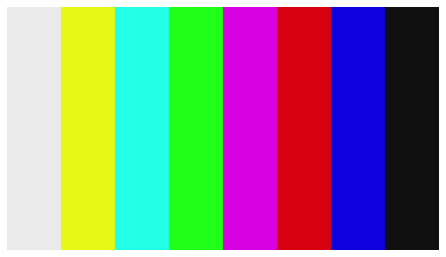

In [2]:
# yuyv YUV422P(Packed)
img = np.fromfile('yuv_images/1280x720.yuyv', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 0]
U = img[::, ::2, 1]
V = img[::, 1::2, 1]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


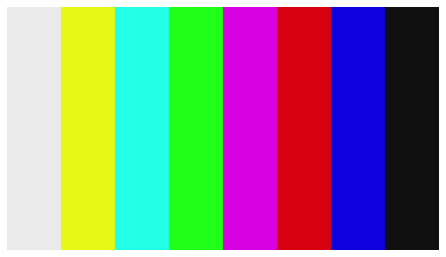

In [3]:
# yvyu
img = np.fromfile('yuv_images/1280x720.yvyu', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 0]
U = img[::, 1::2, 1]
V = img[::, 0::2, 1]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


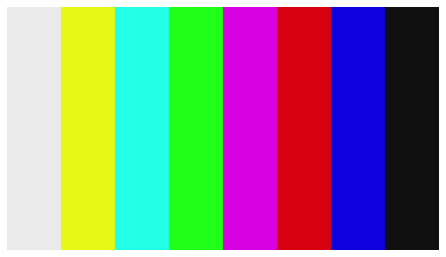

In [4]:
# uyvy
img = np.fromfile('yuv_images/1280x720.uyvy', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 1]
U = img[::, ::2, 0]
V = img[::, 1::2, 0]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


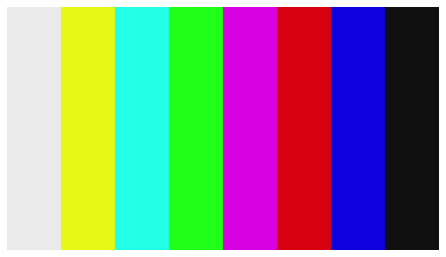

In [5]:
# vyuy
img = np.fromfile('yuv_images/1280x720.vyuy', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 1]
U = img[::, 1::2, 0]
V = img[::, ::2, 0]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


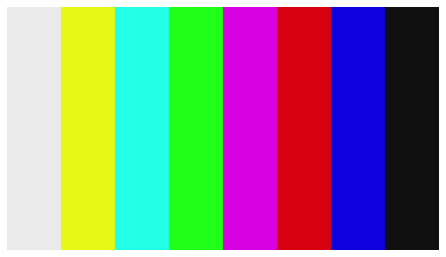

In [6]:
# YUV422P(planar) U前V后:YUV422P又叫I422或YU16
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.422P', dtype='uint8')
Y, U, V = np.split(img, [w*h, w*h*3//2])
Y.shape = h, w
U.shape = h, w//2
V.shape = h, w//2
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


![](YU12.png)

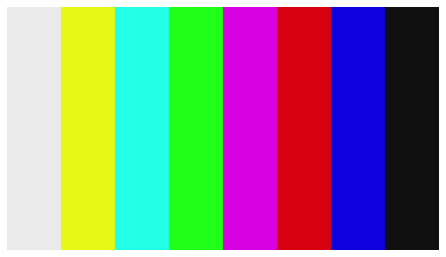

In [7]:
# YUV420P(planar),   根据U、V的顺序，又有2种，U前V后即YUV420P又叫I420或YU12
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.YU12', dtype='uint8')
Y, U, V = np.split(img, [w*h, w*h*5//4])
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


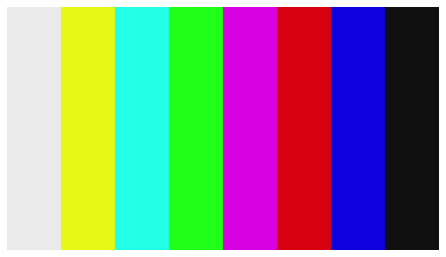

In [8]:
# YUV420P(planar), 根据U、V的顺序，又有2种 V前U后，叫YV12
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.YV12', dtype='uint8')
Y, V, U = np.split(img, [w*h, w*h*5//4])
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


![](NV12.png)

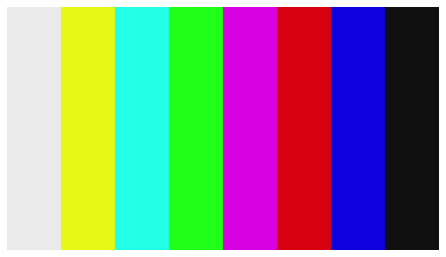

In [9]:
# YUV420SP（planar）根据U、V的顺序，又有2种，U前V后叫NV12，在国内好像很多人叫它为YUV420SP格式；V前U后叫NV21。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV12', dtype='uint8')
Y, UV = np.split(img, [w*h])
U = UV[::2]
V = UV[1::2]
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


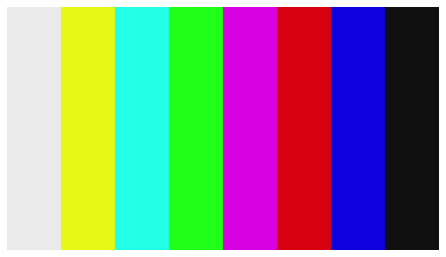

In [10]:
# YUV420SP（planar）根据U、V的顺序，又有2种，U前V后叫NV12，在国内好像很多人叫它为YUV420SP格式；V前U后叫NV21。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV21', dtype='uint8')
Y, UV = np.split(img, [w*h])
V = UV[::2]
U = UV[1::2]
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)

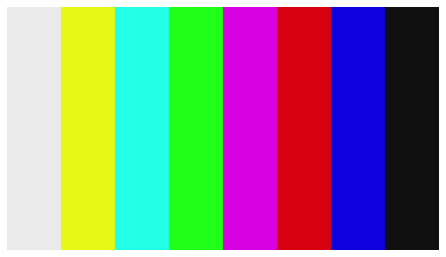

In [11]:
# YUV422SP（planar）根据U、V的顺序，又有2种，U前V后叫NV16，在国内好像很多人叫它为YUV422SP格式；V前U后叫NV61。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV16', dtype='uint8')
Y, UV = np.split(img, 2)
U = UV[::2]
V = UV[1::2]
Y.shape = h, w
U.shape = h, w//2
V.shape = h, w//2
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


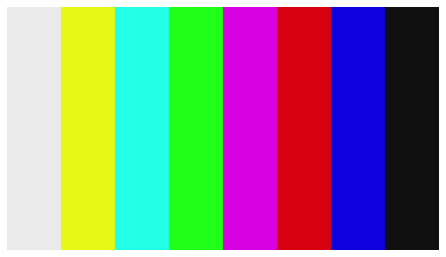

[ 33 255 230]


In [12]:
# YUV422SP（planar）根据U、V的顺序，又有2种，U前V后叫NV16，在国内好像很多人叫它为YUV422SP格式；V前U后叫NV61。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV61', dtype='uint8')
Y, UV = np.split(img, [w*h])
V = UV[::2]
U = UV[1::2]
Y.shape = h, w
U.shape = h, w//2
V.shape = h, w//2
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)
print(rgb[0, 340, :])


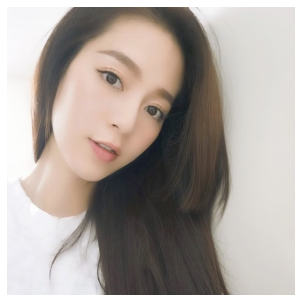

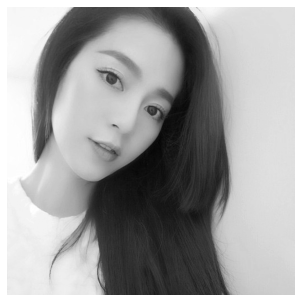

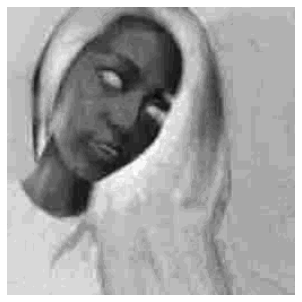

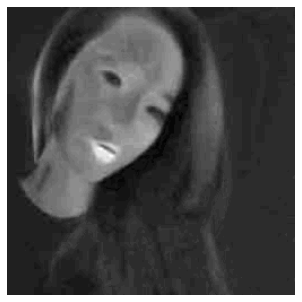

In [13]:
import cv2

img = cv2.imread('lx.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
I420 = cv2.cvtColor(img, cv2.COLOR_BGR2YUV_I420)
Y = I420[:510, :]
UV = I420[510:, :]
UV = UV.flatten()
U, V = np.split(UV, 2)
U = U.reshape(255, 255)
V = V.reshape(255, 255)
show_image(rgb, Y, U, V)
cv2.destroyAllWindows()


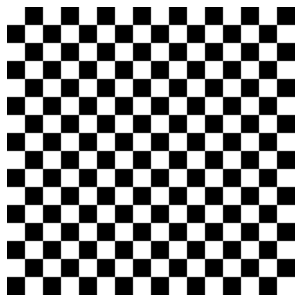

In [14]:
b = np.tile(255, (10, 10, 3))
w = np.tile(0, (10, 10, 3))

s1 = np.hstack((b, w))
s2 = np.hstack((w, b))
s = np.vstack((s1, s2))

s = np.tile(s, (8, 8, 1))

show_image(s)


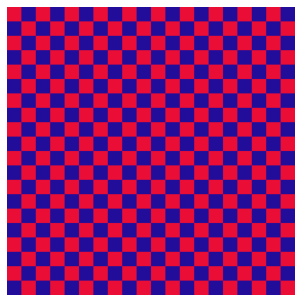

In [15]:
b = np.array([234,13,54], dtype=np.uint8)
b = np.tile(b, (10, 10, 1))
w = np.array([34,13,154], dtype=np.uint8)
w = np.tile(w, (10, 10, 1))
s1 = np.hstack((b, w))
s2 = np.hstack((w, b))
s = np.vstack((s1, s2))
s = np.tile(s, (10, 10, 1))
show_image(s)

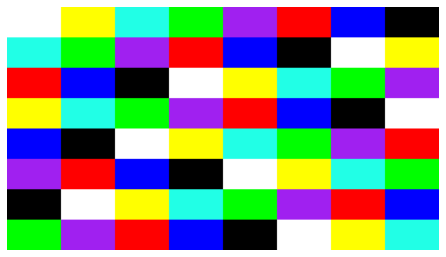

In [16]:
b1 = np.array([0, 0, 0])
b1 = np.tile(b1, (90, 160, 1))

y = np.array([255, 255, 0])
y = np.tile(y, (90, 160, 1))

w = np.array([255, 255, 255])
w = np.tile(w, (90, 160, 1))

b = np.array([0, 0, 255])
b = np.tile(b, (90, 160, 1))

g = np.array([0, 255, 0])
g = np.tile(g, (90, 160, 1))

z = np.array([160, 32, 240])
z = np.tile(z, (90, 160, 1))

r = np.array([255, 0, 0])
r = np.tile(r, (90, 160, 1))

lb = np.array([33, 255, 230])
lb = np.tile(lb, (90, 160, 1))

s1 = np.hstack((w, y, lb, g, z, r, b, b1))
s2 = np.hstack((y, lb, g, z, r, b, b1, w))
s3 = np.hstack((lb, g, z, r, b, b1, w, y))
s4 = np.hstack((g, z, r, b, b1, w, y, lb))
s5 = np.hstack((z, r, b, b1, w, y, lb, g))
s6 = np.hstack((r, b, b1, w, y, lb, g, z))
s7 = np.hstack((b, b1, w, y, lb, g, z, r))
s8 = np.hstack((b1, w, y, lb, g, z, r, b))
s = np.vstack((s1, s3, s6, s2, s7, s5, s8, s4))
show_image(s)


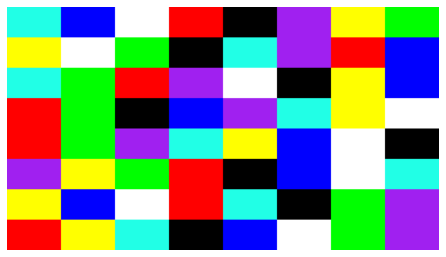

In [17]:
import random
a = np.array([0, 0, 0, 255, 255, 0, 255, 255, 255, 0, 0, 255, 0, 255, 0, 160, 32, 240, 255, 0, 0, 33, 255, 230])
a = np.split(a, len(a)//3)

b = list(map(lambda x: np.tile(x, [90, 160, 1]), a))
c = [np.hstack(b) for _ in b if not random.shuffle(b)]

s = np.vstack(c)
show_image(s)


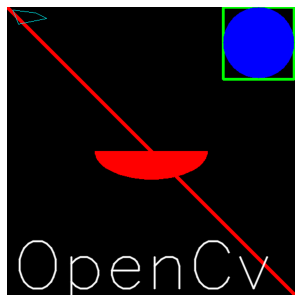

In [18]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCv',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
show_image(img)